In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
import sys
import os

class_path = os.path.abspath(os.path.join(os.path.dirname('__file__'), '../synth_control'))

if class_path not in sys.path:
    sys.path.append(class_path)
    
from synth_control_model import SynthControlModel

Treatment effect in post-intervention period is: 4.33


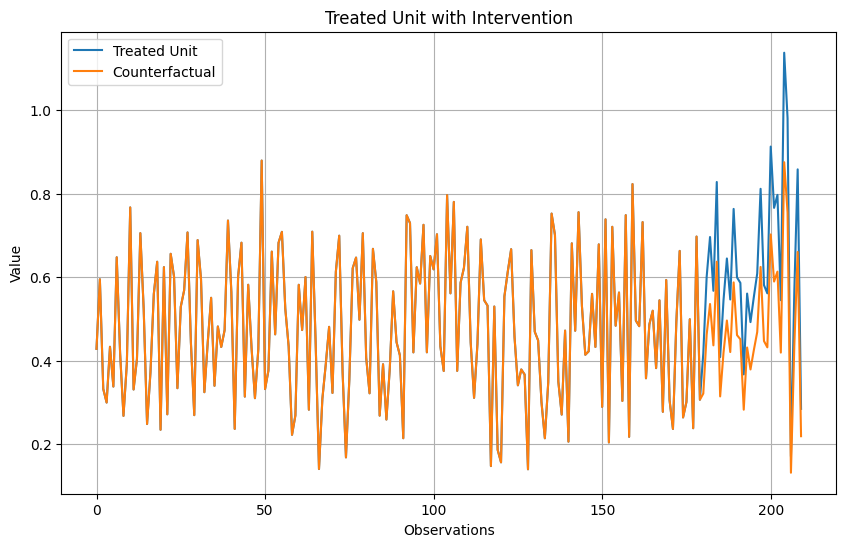

In [7]:
np.random.seed(42)

# data generating process parameters
num_control_units = 5
num_observations = 210
error = 0.10
pre_intervention_indices = slice(0, 180)
post_intervention_indices = slice(180, 211)
intervention_lift = 0.3

# data generating process
control_units = np.random.rand(num_observations, num_control_units)
weights = np.random.dirichlet(np.ones(num_control_units))
signal = np.dot(control_units, weights)
signal_std = np.std(signal)
noise = np.random.normal(0, 0.10 * signal_std, num_observations)
treated_unit_cf = signal + noise

# simulate intervention
treated_unit = treated_unit_cf.copy()
treated_unit[post_intervention_indices] *= (1 + intervention_lift)
treatment_effect = np.sum(treated_unit[post_intervention_indices] - treated_unit_cf[post_intervention_indices])

print(f"Treatment effect in post-intervention period is: {round(treatment_effect, 2)}")

plt.figure(figsize=(10, 6))
plt.plot(treated_unit, label='Treated Unit')
plt.plot(treated_unit_cf, label='Counterfactual')
plt.title('Treated Unit with Intervention')
plt.xlabel('Observations')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

In [8]:
weights

array([0.15484969, 0.05612036, 0.20859707, 0.11953531, 0.46089757])

In [9]:
synth_model = SynthControlModel(control_units, treated_unit, pre_intervention_indices, post_intervention_indices)

In [10]:
synth_model.optimise_weights()

array([0.15392003, 0.056504  , 0.20352903, 0.12297287, 0.46307406])

In [11]:
synth_model.calculate_final_loss()

np.float64(0.2142645211963261)

In [12]:
synth_control = synth_model.calcuate_final_synth_control()

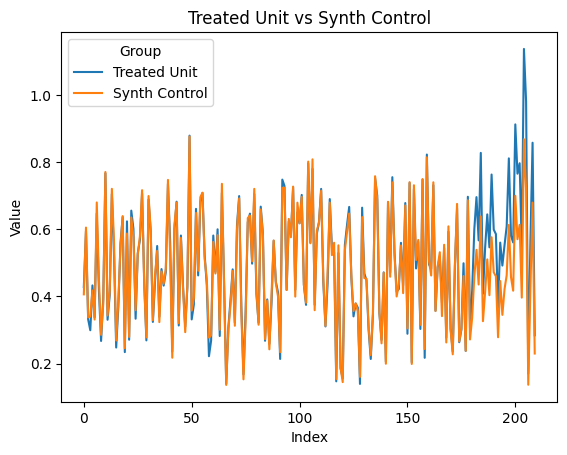

In [13]:
data = pd.DataFrame({
    'Index': range(len(treated_unit)),
    'Treated Unit': treated_unit,
    'Synth Control': synth_control
})

# Melt the DataFrame to long format
data_melted = data.melt(id_vars='Index', var_name='Group', value_name='Value')

# Plot using seaborn
sns.lineplot(data=data_melted, x='Index', y='Value', hue='Group')

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Treated Unit vs Synth Control')
plt.show()

In [14]:
synth_model.causal_impact()

np.float64(4.397554302772033)